# This is the second part of the re-implementation of the PSR method

## Instructions : First compile all the cells of this jupyter notebook (Part_1) and them compilie all
## the cells of jupyter notebook (Part_2).

In [1]:
from utils import *

# Loading documents prepreocessed in jupyter notebook Part_1

In [2]:
labels = []
documents_train = []
documents_test  = []
Y_train = []
Y_test =  []
directory = "NotFilterNgrmas/"

trenamento = 0
ii = 0
for index, name in enumerate(sorted(os.listdir(directory))): #Already sorted
    trenamento += 1
    #if name in tittles_matlab:
        #print(name)
    ii += 1
    f=open("NotFilterNgrmas/"+name, encoding ="utf-8")#"rb"
    #f=open("/home/daniela/Documents/Copia de csa_Predador/Copia de csa_Predador/TMGresults/sample2/"+name,"rb")#"rb"
    document = (f.read()) 

    if "trrainninng" in name:
        documents_train.append(str(document))
        if "posi" in name:
            labels.append(1)
            Y_train.append(1)

        else:
            labels.append(0)
            Y_train.append(0)

    elif "teestiinng" in name:
        documents_test.append(str(document))
        if "posi" in name:
            labels.append(1)
            Y_test.append(1)

        else:
            labels.append(0)
            Y_test.append(0)

print("Loading documents has finished ...")

Loading documents has finished ...


# Counting the number of groomers before the preprocessing of the data

In [3]:
Ys_train = np.asarray(Y_train)
Ys_test = np.asarray(Y_test)
Ys_test_reduce = Y_test


posis_train = np.argwhere(Ys_train==1)
posis_test  = np.argwhere(Ys_test==1)
negas_train = np.argwhere(Ys_train==0)
negas_test  = np.argwhere(Ys_test==0)
print("Groomers: ",len(posis_train)," Non-groomers: ", len(negas_train))
print("Groomers: ",len(posis_test)," Non-groomers: ", len(negas_test))

Groomers:  2016  Non-groomers:  64911
Groomers:  3737  Non-groomers:  151391


In [4]:
print('There are: ',len(documents_train),'   Train labels')
print('There are: ',len(documents_test),'  Test  labels')

There are:  66927    Train labels
There are:  155128   Test  labels


# Preprocesing training and testing conversations

In [5]:
# Processing training conversations
doc_train,Y_train = pre_processing_conversations(documents_train,Ys_train)
Y_train = np.asarray(Y_train)
posi_train = np.argwhere(Y_train==1)
nega_train = np.argwhere(Y_train==0)
print('\033[94m')
print("Train Documents, There are ",len(doc_train)," conversations: ", doc_train[0]," Labels: ",len(Y_train))
print('\033[92m')

# Processing testing conversations
doc_test,Y_test = pre_processing_conversations(documents_test,Ys_test)
Y_test = np.asarray(Y_test)
posi_test  = np.argwhere(Y_test==1)
nega_test  = np.argwhere(Y_test==0)
print("Test Documents, There are ",len(doc_test)," conversations: ", doc_test[0]," Labels: ",len(Y_test))

print('\033[96m')
print("Empty conversations were removed in preprocessing process")
print("Before precessing Train Groomers: ",len(posis_train), " After: ",len(posi_train), "Lost: ",len(posis_train)-len(posi_train))
print("Before precessing Test Groomers: ",len(posis_test), " After: ",len(posi_test), "Lost: ",len(posis_test)-len(posi_test))



Train Documents, There are  65918  conversations:  asl hey che hec eck cki kin ing for gir irl thi hir irt rty hav ave fan ant nta tas ast sti tic vid ids are goi oin ing hea ead ove ver got oto sur urp rpr pri ris ise see ee2 e21 rep epl pla lac ace spa pac ace wit ith  Labels:  65918

Test Documents, There are  152858  conversations:  wir ire rep epa pai air sho hou oul uld all the way wit ith dif iff ffe fer ere ren ent con ons nst str tru ruc uct cto tor xdo dom oma mai ain inr nre req equ que ues est wha hat cal all lle led hel ell llo all hav ave qui uic ick que ues est sti tio ion abo bou out the his ist sto tor ory api the her ere som ome met eth thi hin ing lik ike the sam ame dom oma mai ain pol oli lic icy  Labels:  152858

Empty conversations were removed in preprocessing process
Before precessing Train Groomers:  2016  After:  1904 Lost:  112
Before precessing Test Groomers:  3737  After:  3514 Lost:  223


# Starting with the PSR method

In [6]:
%%time
vocabulary = calculating_vocabulary(doc_train)
print("Vocabulary: ",len(vocabulary))

Vocabulary:  15351
CPU times: user 4.14 s, sys: 7.94 ms, total: 4.15 s
Wall time: 4.16 s


In [7]:
#Note, that lower case ( ) in Vectorizer is by default
vectorizer = CountVectorizer(vocabulary=vocabulary,dtype=np.int) 
X = vectorizer.fit_transform(doc_train)
X_train = X.toarray()
print(X_train.shape)
#print(vectorizer.get_feature_names())

(65918, 15351)


In [8]:
DicC = vectorizer.get_feature_names()
print(len(DicC))

15351


In [9]:
vectorizer = CountVectorizer(vocabulary=DicC,dtype=np.int8) 
X = vectorizer.fit_transform(doc_test)
print(X.shape)


(152858, 15351)


In [10]:
X_test = X.toarray()
num_docs_test = X_test.shape[0]
num_dicc_test = X_test.shape[1]

# PSR algorithm implementation

In [11]:
def csa (X,Y):
    num_docs = X.shape[0] # number of trainning docs
    num_terms = X.shape[1]# number of termos
    num_class = 2
    TR = np.zeros((num_terms, num_class))
    DL = np.sum(X, axis=1) # sum each elemet row, wich is each df element of a document
    DL[DL <1 ] = 1 # Those documents with not terms in dicc, are empty . We put one for avoid div / 0.
    
   
    # Non - Normalization 0'
    for j in range (0,num_class): # j = [0;1]
        docs = np.where(Y == j)[0] 
        for i in range(0,num_terms):
            tf_v = X[docs,i] # tf_v is tern frecuency of each term
            TR[i][j] = sum(np.log2(1 + tf_v / DL [docs]))        
            
            if np.isnan(TR[i][j]):
                TR[i][j] = 0
    #TR = np.nan_to_num(TR)
    print("PRB: (",TR.shape[0],",",TR.shape[1],")")

    # Normalization 1' Sum all the weights vectors 
    n1 = np.sum(TR, axis = 0) #Sum by colum
    n1[n1 < 1] = 1
    Tik = TR / n1
    #Tik = np.nan_to_num(Tik)

    # Normalization 2' Each componet of tik [ti1,ti2]/ [ti1+ti2;ti1+ti2]
    for i in range(0,num_terms):
        suma = sum(Tik[i])
        if suma == 0:
            suma = 1
        Tik[i] = Tik[i] / suma # Tik[i] = Tik[i] / sum(TR[i])

    print("Tik: (",Tik.shape[0],",",Tik.shape[1],")")
    
    # Document Representation
    DR = np.zeros((num_docs, num_class))
    for i in range(0,num_docs):
        termos = np.where(X[i] != 0)[0] # extrac idxs =! 0
        a = X[i][termos] / DL[i]# acces idxs content / len
        a = np.expand_dims(a, axis=1)
        DR[i] = sum(np.multiply(a,Tik[termos])) # alpha (a)* tik; alpha is the df of each term
    # Some of then are empy sentence_vectors[i]  examp 8825 "Nadie se salva de la regla 34 xd"    return Tik
    
    

    return DR,Tik

In [12]:
DR,Tik = csa (X_train,Y_train)
print("DR: (",DR.shape[0],",",DR.shape[1],")")

PRB: ( 15351 , 2 )
Tik: ( 15351 , 2 )
DR: ( 65918 , 2 )


In [13]:
def csa_test (XT,Tik): 
    # Document Test Representation
    num_class = 2
    DLT = np.sum(XT, axis=1)
    DLT[DLT <1 ] = 1
    num_docs = XT.shape[0]
    DRT = np.zeros((num_docs, num_class))
    for i in range(0,num_docs):
        termos = np.where(XT[i] != 0)[0] # extrac idxs =! 0
        a = XT[i][termos] / DLT[i]# acces idxs content / len
        a = np.expand_dims(a, axis=1)
        DRT[i] = sum(np.multiply(a,Tik[termos]))
    return DRT

In [14]:
DRT = csa_test (X_test,Tik)
print("DRT: (",DRT.shape[0],",",DRT.shape[1],")")
del X_train,X_test
gc.collect()

DRT: ( 152858 , 2 )


0

# Training the classifier

In [15]:
f1_g, model = blackbox_classifier(DR,DRT,Y_train,Y_test)
print("The F1 mesure with the 100% of the information is: ",f1_g)

The F1 mesure with the 100% of the information is:  0.2992


# Obtaining testing documents with out preprocessing to perform the simularion

In [16]:
non_pro_docs = non_process_docs()   
print(len(non_pro_docs))
retains = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
#simulated_docs = get_percentage_document(non_pro_docs,retains)
#saving_pkl(simulated_docs,"Savings/simulated_docs")
simulated_docs = loading_pkl("Savings/simulated_docs")

Number of Test non-process Docs:  155128
155128


# Online stage
## Simulating sequential arrival of messages

In [17]:
def simulation(retains,simulated_docs,model,labels):
    j = 0
    doc_predictions = []
    for sd in (simulated_docs):
        # Each sd contains  the x% of every document 
        print("---------------------------------------- ",retains[j]," ---------------------------------------------")
        # Converting text into n-grams
        sd_grams = n_grams(sd)

 

        # Processing the set of documents
        doc_partial,Y_partial = pre_processing_conversations(sd_grams,labels)
        Y_partial = np.asarray(Y_partial)

        # Transforming the documents to a matrix
        X = vectorizer.fit_transform(doc_partial)
        X_test = X.toarray()
        print(X_test.shape)
        

        # Applying the PSR algorithm 
        DRT_partial = csa_test (X_test,Tik)
        print("DRT: (",DRT_partial.shape[0],",",DRT_partial.shape[1],")")
   
        # Performing predictions
        Y_pred = model.predict(DRT_partial)
        f1_g = error_filtering(Y_partial,Y_pred)
        doc_predictions.append(f1_g)
        print("F1 mesure with ",retains[j]*10,"% of the information available is",f1_g)

        # Free memory
        del doc_partial,DRT_partial,f1_g
        gc.collect()
        j += 1
    return doc_predictions

In [18]:
f1_l = simulation(retains,simulated_docs,model,Ys_test)

----------------------------------------  0.1  ---------------------------------------------
(88571, 15351)
DRT: ( 88571 , 2 )
F1 mesure with  1.0 % of the information available is 0.1597
----------------------------------------  0.2  ---------------------------------------------
(113090, 15351)
DRT: ( 113090 , 2 )
F1 mesure with  2.0 % of the information available is 0.195
----------------------------------------  0.3  ---------------------------------------------
(129458, 15351)
DRT: ( 129458 , 2 )
F1 mesure with  3.0 % of the information available is 0.2055
----------------------------------------  0.4  ---------------------------------------------
(137447, 15351)
DRT: ( 137447 , 2 )
F1 mesure with  4.0 % of the information available is 0.2216
----------------------------------------  0.5  ---------------------------------------------
(142726, 15351)
DRT: ( 142726 , 2 )
F1 mesure with  5.0 % of the information available is 0.2458
----------------------------------------  0.6  ------

# Testing with the SGD testing corpus

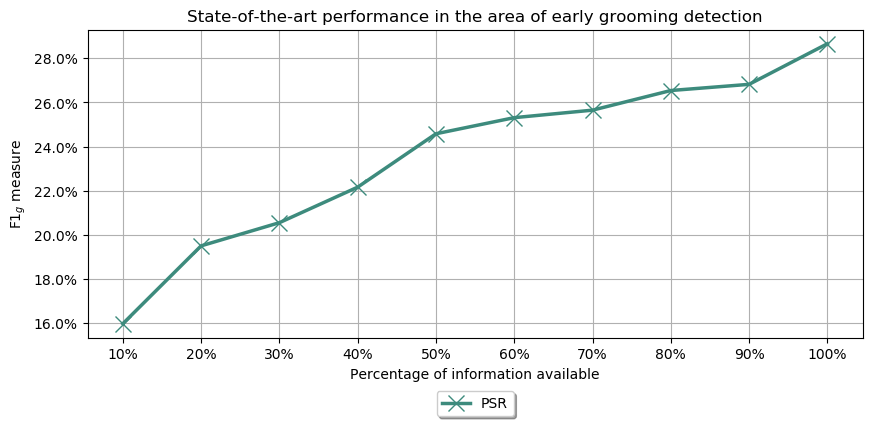

In [19]:
results = f1_l.copy()
plotting(results,"#3D8B7D","x","PSR")

In [20]:
def simulation(PATH,num_chunks,retains,model):
    print("Extracting conversations")
    data_set = loading_pkl(PATH) 
    matrix_text,labels,start_time_conversations,number_participants,matrix = data_set
    print("%text: ",(matrix_text.shape))
    print("labels: ",len(labels),labels[0])
    print("start_time_conversations: ",len(start_time_conversations),start_time_conversations[0])
    print("# participants: ",(number_participants.shape),number_participants[0][0])
    print("%int matrix: ",(matrix.shape),matrix[0][0])
    print("+"*40)
    
    j = 0
    doc_predictions = []
    for chunk in range(num_chunks):
        # Each sd contains  the x% of every document 
        print("---------------------------------------- ",retains[j]," ---------------------------------------------")
    
        
        doc_partial = matrix_text[:,chunk]
        Y_partial = labels

        groomer_before = sum([1 for i in Y_partial if i ==1])
        sd = doc_partial
        # Converting text into n-grams
        sd_grams = n_grams(sd)
 

        # Processing the set of documents
        doc_partial,Y_partial = pre_processing_conversations(sd_grams,Y_partial)
        #print(doc_partial[0])
        Y_partial = np.asarray(Y_partial)
        groomer_after = sum([1 for i in Y_partial if i ==1])
 
        # Transforming the documents to a matrix
        X = vectorizer.fit_transform(doc_partial)
        X_test = X.toarray()
        print(X_test.shape)
        

        # Applying the PSR algorithm 
        DRT_partial = csa_test (X_test,Tik)
        print("DRT: (",DRT_partial.shape[0],",",DRT_partial.shape[1],")")
   
        # Performing predictions
        Y_pred = model.predict(DRT_partial)
        f1_g = error_filtering_ii(Y_partial,Y_pred)
        doc_predictions.append(f1_g)
        print("F1 mesure with ",retains[j]*10,"% of the information available is",f1_g)

        # Free memory
        del doc_partial,DRT_partial,f1_g
        gc.collect()
        j += 1
    print("Predictions: ",doc_predictions)
    return doc_predictions

# Testing with PJZC dataset

Extracting conversations
%text:  (21070, 10)
labels:  21070 0
start_time_conversations:  21070 18:10
# participants:  (21070, 10) [1]
%int matrix:  (21070, 10) [1. 0. 0. 0. 0.]
++++++++++++++++++++++++++++++++++++++++
----------------------------------------  0.1  ---------------------------------------------
(20795, 15351)
DRT: ( 20795 , 2 )
Filter groomers:  39
F1 mesure with  1.0 % of the information available is 0.1985
----------------------------------------  0.2  ---------------------------------------------
(20828, 15351)
DRT: ( 20828 , 2 )
Filter groomers:  34
F1 mesure with  2.0 % of the information available is 0.2264
----------------------------------------  0.3  ---------------------------------------------
(20853, 15351)
DRT: ( 20853 , 2 )
Filter groomers:  31
F1 mesure with  3.0 % of the information available is 0.2286
----------------------------------------  0.4  ---------------------------------------------
(20869, 15351)
DRT: ( 20869 , 2 )
Filter groomers:  28
F1 mesu

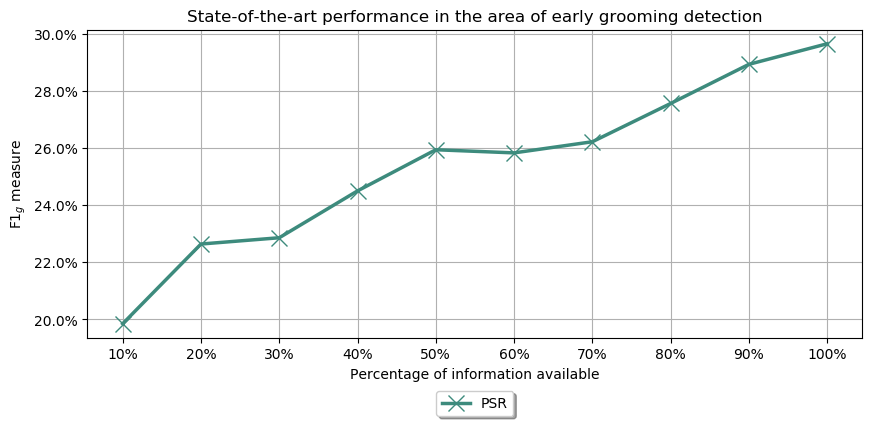

In [21]:
PATH = "../../Data/PJZC.pkl"
doc_predictions = simulation(PATH,10,retains,model)
results = doc_predictions.copy()
plotting(results,"#3D8B7D","x","PSR")

# Testing with PJZ dataset

Extracting conversations
%text:  (13822, 10)
labels:  13822 0
start_time_conversations:  13822 05:16
# participants:  (13822, 10) [2]
%int matrix:  (13822, 10) [0.625 0.375 0.    0.    0.   ]
++++++++++++++++++++++++++++++++++++++++
----------------------------------------  0.1  ---------------------------------------------
(13708, 15351)
DRT: ( 13708 , 2 )
Filter groomers:  39
F1 mesure with  1.0 % of the information available is 0.2338
----------------------------------------  0.2  ---------------------------------------------
(13724, 15351)
DRT: ( 13724 , 2 )
Filter groomers:  34
F1 mesure with  2.0 % of the information available is 0.2615
----------------------------------------  0.3  ---------------------------------------------
(13733, 15351)
DRT: ( 13733 , 2 )
Filter groomers:  31
F1 mesure with  3.0 % of the information available is 0.2593
----------------------------------------  0.4  ---------------------------------------------
(13741, 15351)
DRT: ( 13741 , 2 )
Filter groome

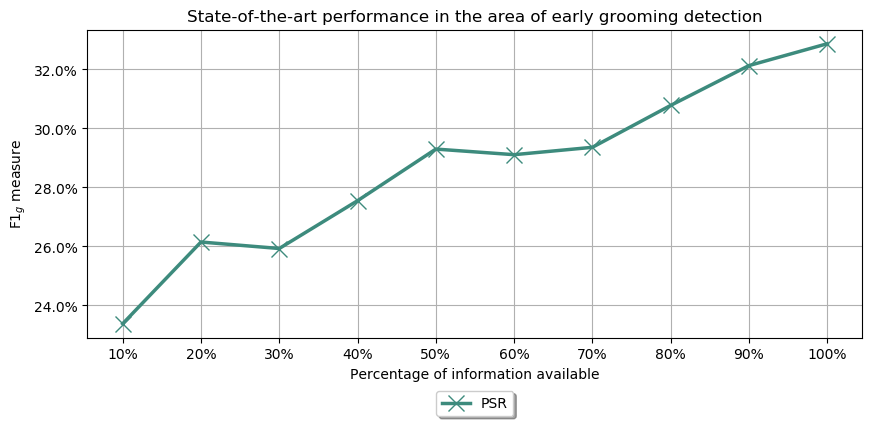

In [22]:
PATH = "../../Data/PJZ.pkl"
doc_predictions = simulation(PATH,10,retains,model)
results = doc_predictions.copy()
plotting(results,"#3D8B7D","x","PSR")